<a href="https://colab.research.google.com/github/Moimschoh/data-analyst/blob/main/analysing_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from IPython.display import display
import os
import sys
from datetime import date,timedelta
import json
import numpy as np
import time
from math import cos, sin
from os import path
from statsmodels.stats.anova import AnovaRM
from scipy.special import gammaln
import math
import plotly.express as px
from sklearn.metrics import r2_score
from scipy.stats import circmean


In [ ]:
print(np.__version__)

1.21.5


In [ ]:
pip install natsort

In [ ]:
#Path Definition

EEDA_PATH = r"C:\Users\49178\Downloads\Telegram Desktop\LoopARData"
ET_DATA_PATH = EEDA_PATH + r'\EyeTracking\eye\ooooo'
SCENE_EVENT_DATA_PATH = EEDA_PATH +  r'\SceneData\scene\com'
STEERING_DATA_PATH = EEDA_PATH + r'\Input\input'
PARTICIPANT_DATA_PATH = EEDA_PATH + r'\ParticipantCalibrationData\cakibration'
PROCESSED_DATA_PATH = '..\csv_et'
COMBINED_DATA_PATH = '..\et_comb'
EVENT_DURATION_DATA_PATH = '..\Event_dur'
ONLY_EVENTS_DATA_PATH = r'C:\Users\49178\Downloads\Telegram Desktop\LoopARData\FullLoopAR1'
Cut_EVENTS_Df_DATA_PATH = r'C:\Users\49178\Desktop\mastertheses\All_last_df\Event_final'
Cut_EVENTS_Df_DATA_PATH1 = r'C:\Users\49178\Desktop\mastertheses\All_last_df\df_final'
Cut_EVENTS_Df_DATA_PATH2 = r'C:\Users\49178\Desktop\mastertheses\Cut_Event_df\df_ev_state'



Obj_Df_DATA_PATH = r'C:\Users\49178\Desktop\mastertheses\df_obj'


EVENTS_OBJECT_PATH = '..\Evt_Objects'



PLOT_PATH = '..\PLOTS\data_quality'
os.makedirs(os.path.dirname(PROCESSED_DATA_PATH),exist_ok=True)
os.makedirs(os.path.dirname(COMBINED_DATA_PATH),exist_ok=True)
os.makedirs(os.path.dirname(PLOT_PATH), exist_ok=True)

In [ ]:
files = glob.glob(f'{Cut_EVENTS_Df_DATA_PATH}\*.csv')

mylist = list()
for fi in files[:]: # reading all files
    mylist.append(fi)
mylist


['C:\\Users\\49178\\Desktop\\mastertheses\\All_last_df\\Event_final\\Event_dur_df_AudOnly.csv',
 'C:\\Users\\49178\\Desktop\\mastertheses\\All_last_df\\Event_final\\Event_dur_df_Basecondition.csv',
 'C:\\Users\\49178\\Desktop\\mastertheses\\All_last_df\\Event_final\\Event_dur_df_full.csv',
 'C:\\Users\\49178\\Desktop\\mastertheses\\All_last_df\\Event_final\\Event_dur_df_HudOnly.csv']

In [ ]:
# here we read all the cut events for all conditions and put them into a big df for analysing
ToDrop = ['UnixTimeStamp', 'Scene', 'eye_theta_h_int','eye_theta_v_int','SteeringInput','AcellerationInput','BrakeInput','eye_theta_v_deg','time_from_start']
files = glob.glob(f'{Cut_EVENTS_Df_DATA_PATH1}\*.csv')
li = []
for f in sorted(files):
    df_Ev_all = pd.read_csv(f, index_col=[0] , header=0)   # to get rid of unnamed column we use index_col=[0]  index_col=['timestamp'] for indexes insteads of date
    df_Ev_all = df_Ev_all.reset_index(drop=True)
    li.append(df_Ev_all)
   # df_Ev_all = df_Ev_all.reset_index(drop=True)
    df_Ev_all= pd.concat(li, axis=0, ignore_index=True)

df_Ev_all = df_Ev_all.fillna(method='ffill')
#df_Ev_all = df_Ev_all.dropna(subset=['angular_velocity'])
df_Ev_all = df_Ev_all.drop(ToDrop, axis=1)
df_Ev_all  = df_Ev_all.sort_values(by='timestamp', ascending=True, ignore_index=True)
df_Ev_all['timestamp'] = pd.to_datetime(df_Ev_all['timestamp'])

df_Ev_all

,timestamp,uid,Condition,angle,eye_theta_h_deg,Event,SuccessfulCompletionState,angular_velocity,angular_velocity_eye_h
0,2020-09-19 08:42:52.956203264,f0eb2a21700848549a2846b6c5b09ad5,FullLoopAR,-21.2,0.0,Event_1,True,-18.248175,0.000000
1,2020-09-19 08:42:52.971163136,f0eb2a21700848549a2846b6c5b09ad5,FullLoopAR,-21.2,0.0,Event_1,True,0.000000,0.000000
2,2020-09-19 08:42:52.993105152,f0eb2a21700848549a2846b6c5b09ad5,FullLoopAR,-21.2,-9.3,Event_1,True,0.000000,-423.883318
3,2020-09-19 08:42:53.005072896,f0eb2a21700848549a2846b6c5b09ad5,FullLoopAR,-21.2,-8.8,Event_1,True,0.000000,41.771094
4,2020-09-19 08:42:53.026017792,f0eb2a21700848549a2846b6c5b09ad5,FullLoopAR,-21.2,-9.0,Event_1,True,0.000000,-9.551098
...,...,...,...,...,...,...,...,...,...
791699,2020-12-10 14:51:48.486294016,5b086469856442e8abac0651c33e2c8e,AudioOnly,-0.1,1.9,Event_12,True,-4.557885,-4.557885
791700,2020-12-10 14:51:48.509232896,5b086469856442e8abac0651c33e2c8e,AudioOnly,-0.8,1.9,Event_12,True,-30.514385,0.000000
791701,2020-12-10 14:51:48.520203776,5b086469856442e8abac0651c33e2c8e,AudioOnly,-1.2,2.0,Event_12,True,-36.463081,9.115770
791702,2020-12-10 14:51:48.541148416,5b086469856442e8abac0651c33e2c8e,AudioOnly,-1.7,2.0,Event_12,True,-23.877746,0.000000


In [ ]:
# count ther number of participants in each condition
Event_counts = df_Ev_all.groupby('Condition')['uid'].nunique()
Event_counts
#df_Ev_all['eye_theta_h_deg'].isnull().sum()


Condition
AudioOnly        24
BaseCondition    32
FullLoopAR       36
HUDOnly          33
Name: uid, dtype: int64

In [ ]:
# here we read all the scene data for analysing later the number of SuccessfulCompletionState in each condition
ToDrop = ['StartofEventTimeStamp', 'scene', 'EndOfEventTimeStamp','HitObjectName',]
files = glob.glob(f'{Cut_EVENTS_Df_DATA_PATH}\*.csv')
li = []
for f in sorted(files):
    df_Ev_all_state = pd.read_csv(f, index_col=[0] , header=0)   # to get rid of unnamed column we use index_col=[0]  index_col=['timestamp'] for indexes insteads of date
    df_Ev_all_state = df_Ev_all_state.reset_index(drop=True)
    li.append(df_Ev_all_state)
   # df_Ev_all = df_Ev_all.reset_index(drop=True)
    df_Ev_all_state= pd.concat(li, axis=0, ignore_index=True)

df_Ev_all_state = df_Ev_all_state.fillna(method='ffill')

df_Ev_all_state = df_Ev_all_state.drop(ToDrop, axis=1)
df_Ev_all_state  = df_Ev_all_state.sort_values(by='Condition', ascending=True, ignore_index=True)

df_Ev_all_state

,EventName,EventDuration,SuccessfulCompletionState,uid,Condition
0,Event_1,6.324314,True,13ec39a03bbb465eae777fe9564c7e97,AudioOnly
1,Event_4,2.834762,True,beeea83429274984b2b016773492d208,AudioOnly
2,Event_3,16.970107,True,beeea83429274984b2b016773492d208,AudioOnly
3,Event_2,8.946617,True,beeea83429274984b2b016773492d208,AudioOnly
4,Event_1,15.709855,True,beeea83429274984b2b016773492d208,AudioOnly
...,...,...,...,...,...
1495,Event_5,3.519006,False,e51c62a636934699b9a2b304635ba0fe,HUDOnly
1496,Event_6,7.232248,True,e51c62a636934699b9a2b304635ba0fe,HUDOnly
1497,Event_7,9.274712,True,e51c62a636934699b9a2b304635ba0fe,HUDOnly
1498,Event_9,7.642470,True,e51c62a636934699b9a2b304635ba0fe,HUDOnly


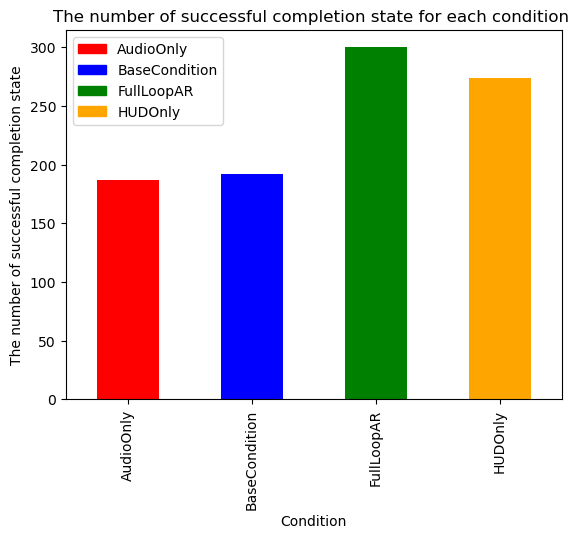

,SuccessfulCompletionState
Condition,
AudioOnly,187
BaseCondition,192
FullLoopAR,300
HUDOnly,274


<Figure size 640x480 with 0 Axes>

In [ ]:
# The number of successful completion state for each condition
# Define a dictionary of colors for each condition
colors = {'AudioOnly': 'red', 'BaseCondition': 'blue', 'FullLoopAR': 'green', 'HUDOnly': 'orange'}
True_counts = df_Ev_all_state.groupby('Condition')['SuccessfulCompletionState'].apply(lambda x: (x == True).sum())
# The df of successful completion state
True_counts = pd.DataFrame(data=True_counts)
ax = True_counts.plot(kind='bar')

# Set the color for each bar based on the condition
for i, condition in enumerate(True_counts.index):
    ax.patches[i].set_facecolor(colors[condition])

# Set the legend labels to the condition names
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors]
labels = colors.keys()
plt.legend(handles, labels)
plt.xlabel('Condition')
plt.ylabel('The number of successful completion state')
plt.title('The number of successful completion state for each condition ')

# Show the plot
plt.show()
#plt.savefig('df_Ev_all_state_true_state .png')

True_counts


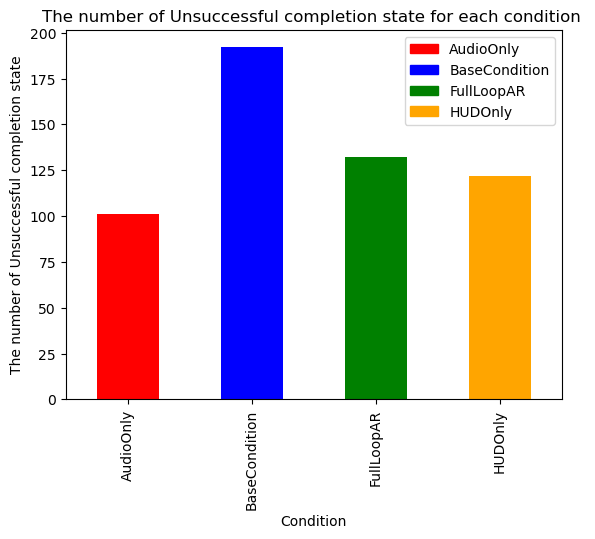

,SuccessfulCompletionState
Condition,
AudioOnly,101
BaseCondition,192
FullLoopAR,132
HUDOnly,122


<Figure size 640x480 with 0 Axes>

In [ ]:
# The number of Unsuccessful completion state for each condition
# Define a dictionary of colors for each condition
colors = {'AudioOnly': 'red', 'BaseCondition': 'blue', 'FullLoopAR': 'green', 'HUDOnly': 'orange'}
True_counts = df_Ev_all_state.groupby('Condition')['SuccessfulCompletionState'].apply(lambda x: (x == False).sum())
# The df of unsuccessful completion state
True_counts = pd.DataFrame(data=True_counts)
ax = True_counts.plot(kind='bar')

# Set the color for each bar based on the condition
for i, condition in enumerate(True_counts.index):
    ax.patches[i].set_facecolor(colors[condition])

# Set the legend labels to the condition names
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors]
labels = colors.keys()
plt.legend(handles, labels)
plt.xlabel('Condition')
plt.ylabel('The number of Unsuccessful completion state')
plt.title('The number of Unsuccessful completion state for each condition ')

# Show the plot
plt.show()
#plt.savefig('df_Ev_all_state_False_state .png')

True_counts

,EventName,SuccessfulCompletionState
0,Event_1,61
1,Event_2,68
2,Event_3,34
3,Event_4,125
4,Event_5,68
5,Event_6,111
6,Event_7,94
7,Event_8,83
8,Event_9,67
9,Event_10,95


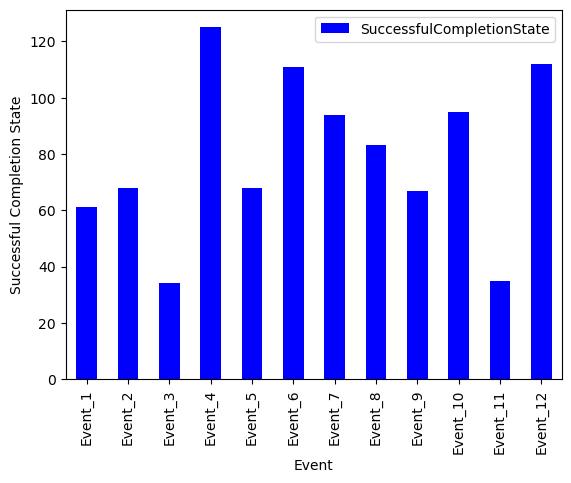

In [ ]:
# # 'The number of successful completion state for each event
event_order = ['Event_1', 'Event_2', 'Event_3', 'Event_4', 'Event_5', 'Event_6', 'Event_7', 'Event_8', 'Event_9', 'Event_10', 'Event_11', 'Event_12']
# Define a dictionary of colors for each event
True_Event_counts = df_Ev_all_state.groupby('EventName')['SuccessfulCompletionState'].apply(lambda x: (x == True).sum()).reset_index()

# Sort by event name
#True_counts = True_counts.sort_values(by='Event')
# Sort the dataframe based on the order of events
True_Event_counts = True_Event_counts.set_index('EventName').loc[event_order].reset_index()
# Create the bar plot
ax = True_Event_counts.plot(kind='bar', x='EventName', y='SuccessfulCompletionState', color='blue')

# Set the x-axis tick labels to the event names
ax.set_xticklabels(True_Event_counts['EventName'])

# Add x-axis and y-axis labels
ax.set_xlabel('Event')
ax.set_ylabel('Successful Completion State')

# Show the plot
#plt.show()
#plt.savefig('True_counts .png')
True_Event_counts

In [ ]:
# here we categorize the events into two different levels (difficult and easy )based on movibility of critical traffic objects
# Define a function to map events to levels
def map_event_to_level(event):
    if event in  ['Event_2', 'Event_3', 'Event_5', 'Event_6','Event_10','Event_12']:
        return 'Easy'

    elif event in  ['Event_1', 'Event_4', 'Event_7', 'Event_8','Event_9', 'Event_11']:
        return 'Difficult'
    else:
        return 'unknown'

# Add a new column based on the values in the 'event' column
df_Ev_all['Level'] = df_Ev_all['Event'].apply(lambda x: map_event_to_level(x))
df_Ev_all

,timestamp,uid,Condition,angle,eye_theta_h_deg,Event,SuccessfulCompletionState,angular_velocity,angular_velocity_eye_h,Level
0,2020-09-19 08:42:52.956203264,f0eb2a21700848549a2846b6c5b09ad5,FullLoopAR,-21.2,0.0,Event_1,True,-18.248175,0.000000,Difficult
1,2020-09-19 08:42:52.971163136,f0eb2a21700848549a2846b6c5b09ad5,FullLoopAR,-21.2,0.0,Event_1,True,0.000000,0.000000,Difficult
2,2020-09-19 08:42:52.993105152,f0eb2a21700848549a2846b6c5b09ad5,FullLoopAR,-21.2,-9.3,Event_1,True,0.000000,-423.883318,Difficult
3,2020-09-19 08:42:53.005072896,f0eb2a21700848549a2846b6c5b09ad5,FullLoopAR,-21.2,-8.8,Event_1,True,0.000000,41.771094,Difficult
4,2020-09-19 08:42:53.026017792,f0eb2a21700848549a2846b6c5b09ad5,FullLoopAR,-21.2,-9.0,Event_1,True,0.000000,-9.551098,Difficult
...,...,...,...,...,...,...,...,...,...,...
791699,2020-12-10 14:51:48.486294016,5b086469856442e8abac0651c33e2c8e,AudioOnly,-0.1,1.9,Event_12,True,-4.557885,-4.557885,Easy
791700,2020-12-10 14:51:48.509232896,5b086469856442e8abac0651c33e2c8e,AudioOnly,-0.8,1.9,Event_12,True,-30.514385,0.000000,Easy
791701,2020-12-10 14:51:48.520203776,5b086469856442e8abac0651c33e2c8e,AudioOnly,-1.2,2.0,Event_12,True,-36.463081,9.115770,Easy
791702,2020-12-10 14:51:48.541148416,5b086469856442e8abac0651c33e2c8e,AudioOnly,-1.7,2.0,Event_12,True,-23.877746,0.000000,Easy


In [ ]:
df_success = df_Ev_all[df_Ev_all['SuccessfulCompletionState'] == True]
df_success

,timestamp,uid,Condition,angle,eye_theta_h_deg,Event,SuccessfulCompletionState,angular_velocity,angular_velocity_eye_h,Level
0,2020-09-19 08:42:52.956203264,f0eb2a21700848549a2846b6c5b09ad5,FullLoopAR,-21.2,0.0,Event_1,True,-18.248175,0.000000,Difficult
1,2020-09-19 08:42:52.971163136,f0eb2a21700848549a2846b6c5b09ad5,FullLoopAR,-21.2,0.0,Event_1,True,0.000000,0.000000,Difficult
2,2020-09-19 08:42:52.993105152,f0eb2a21700848549a2846b6c5b09ad5,FullLoopAR,-21.2,-9.3,Event_1,True,0.000000,-423.883318,Difficult
3,2020-09-19 08:42:53.005072896,f0eb2a21700848549a2846b6c5b09ad5,FullLoopAR,-21.2,-8.8,Event_1,True,0.000000,41.771094,Difficult
4,2020-09-19 08:42:53.026017792,f0eb2a21700848549a2846b6c5b09ad5,FullLoopAR,-21.2,-9.0,Event_1,True,0.000000,-9.551098,Difficult
...,...,...,...,...,...,...,...,...,...,...
791699,2020-12-10 14:51:48.486294016,5b086469856442e8abac0651c33e2c8e,AudioOnly,-0.1,1.9,Event_12,True,-4.557885,-4.557885,Easy
791700,2020-12-10 14:51:48.509232896,5b086469856442e8abac0651c33e2c8e,AudioOnly,-0.8,1.9,Event_12,True,-30.514385,0.000000,Easy
791701,2020-12-10 14:51:48.520203776,5b086469856442e8abac0651c33e2c8e,AudioOnly,-1.2,2.0,Event_12,True,-36.463081,9.115770,Easy
791702,2020-12-10 14:51:48.541148416,5b086469856442e8abac0651c33e2c8e,AudioOnly,-1.7,2.0,Event_12,True,-23.877746,0.000000,Easy


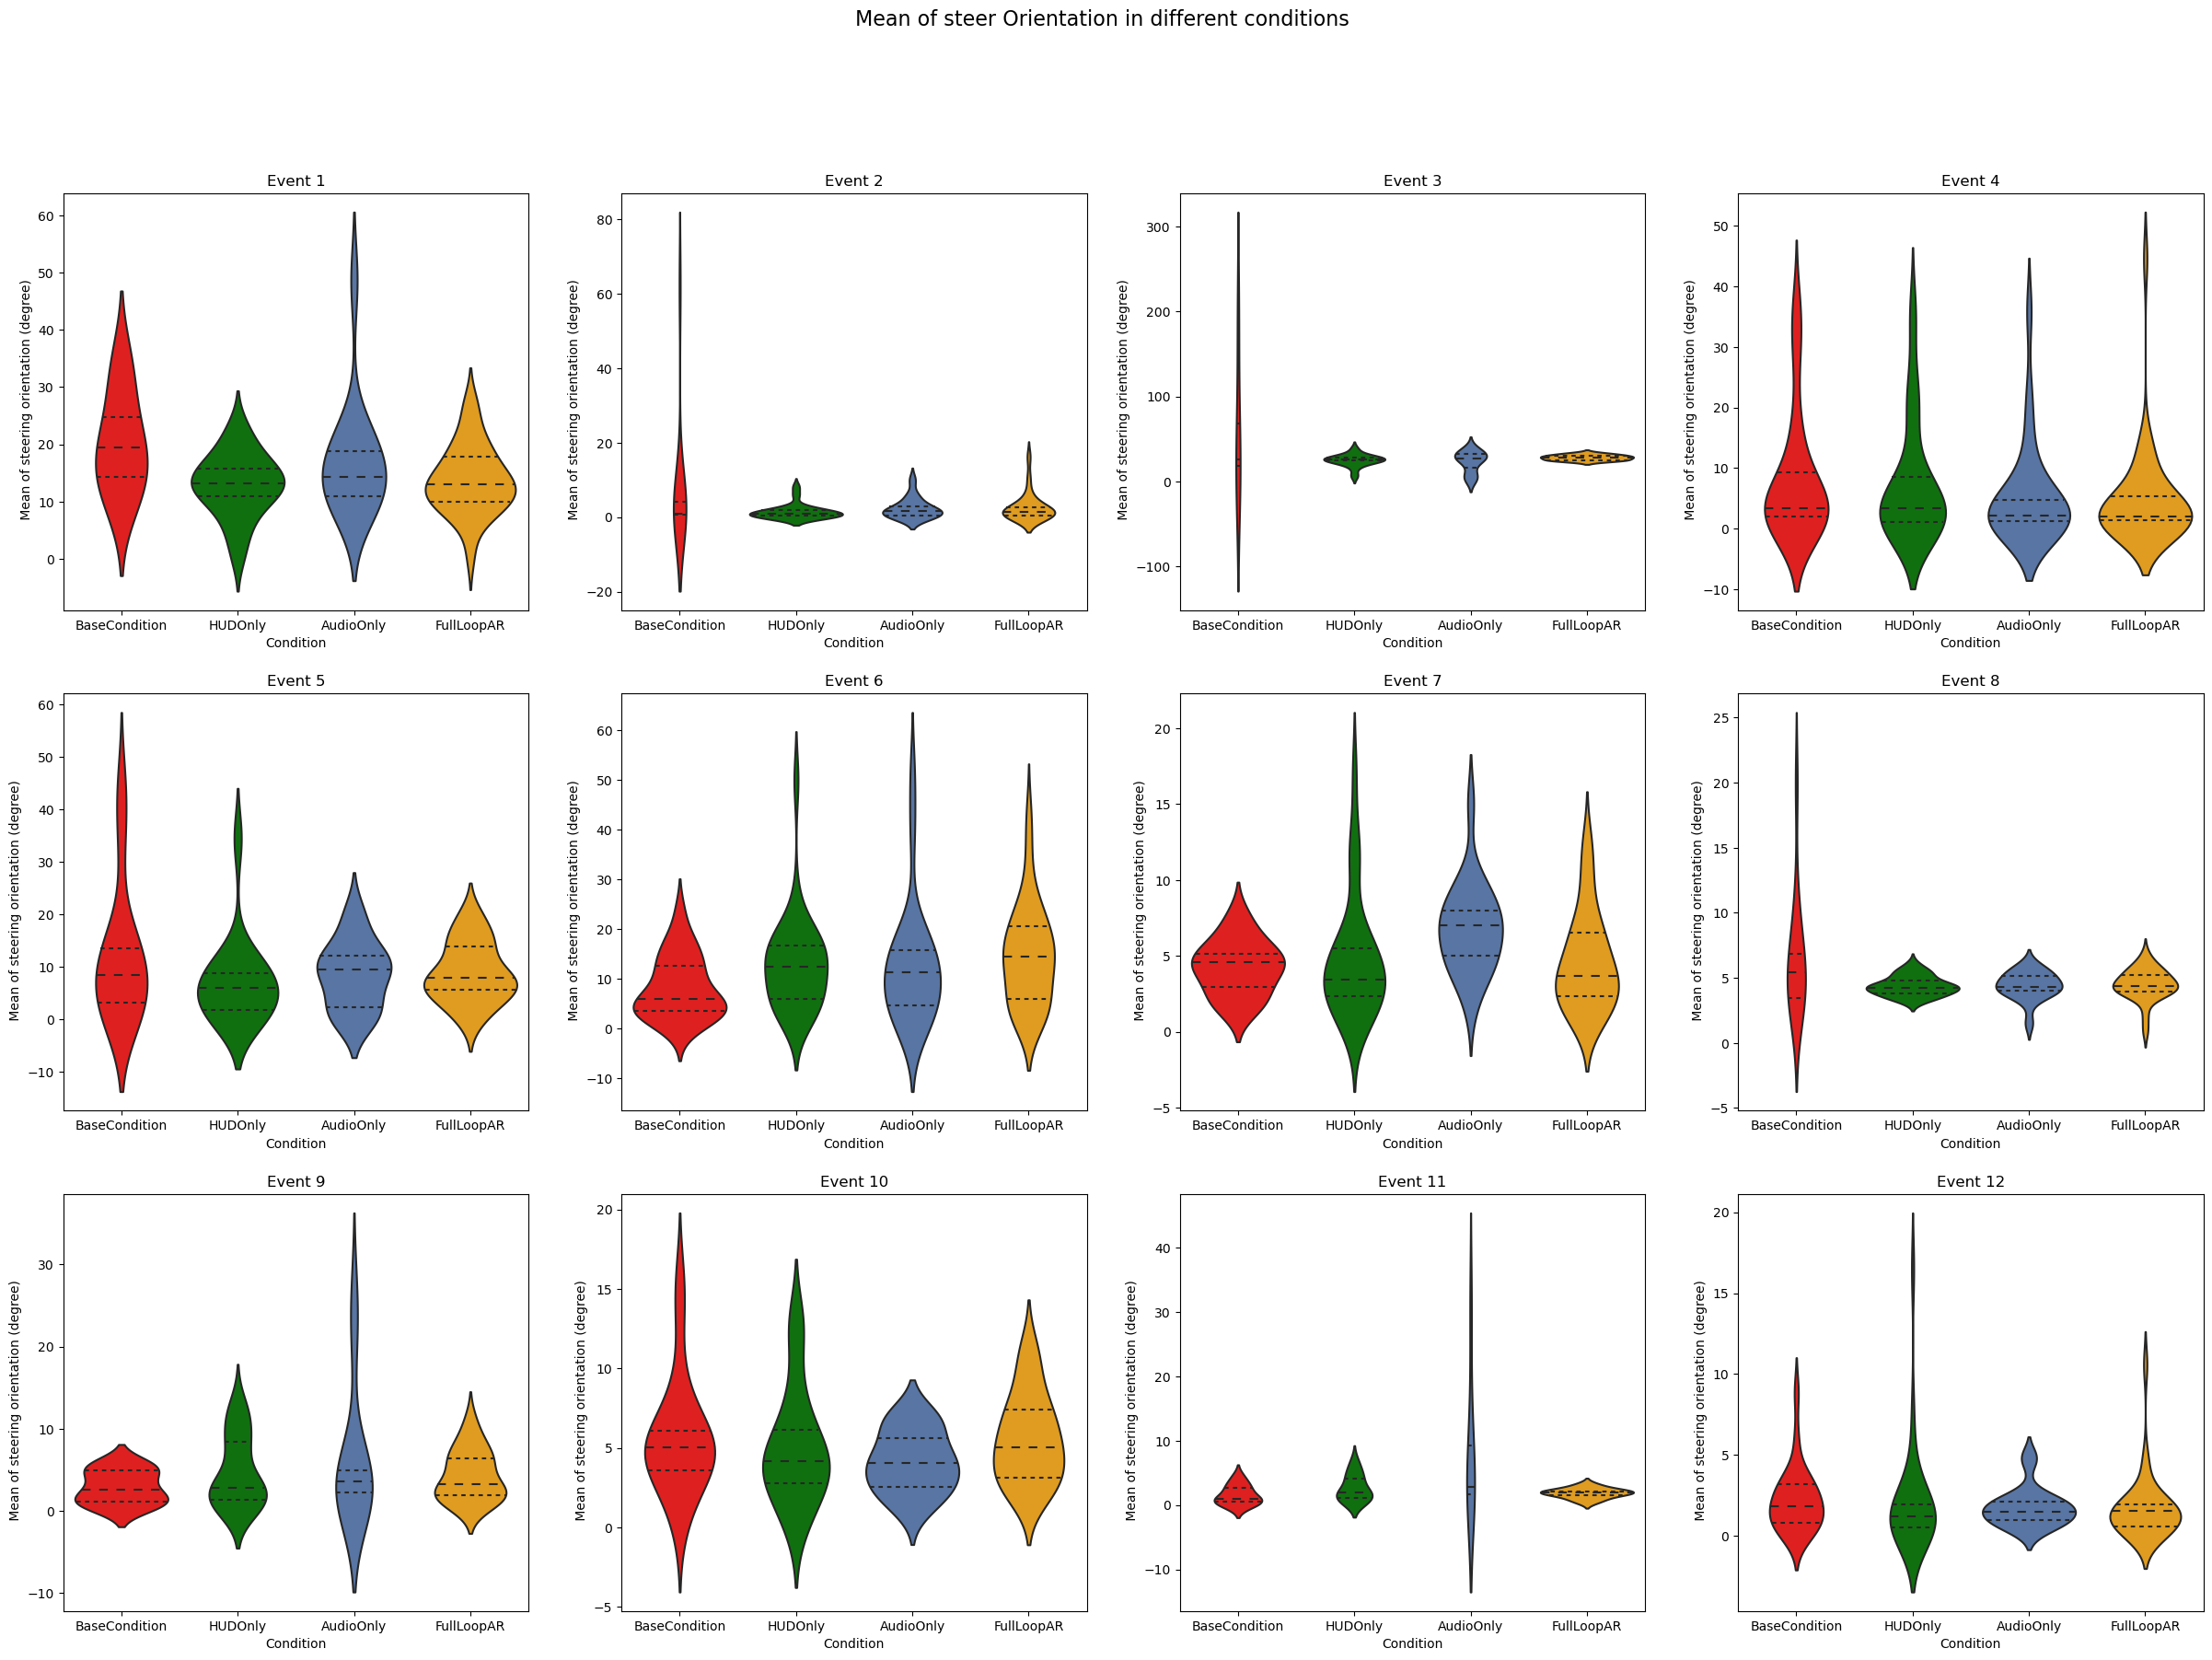

In [ ]:
# here we take absolute mean of steerinput(angle) based on event, uid (participant) and condition and plot the violin plot for all 12 events
cond_color_dict = {
    'HUDOnly': 'green',
    'AudioOnly': (0.298, 0.447, 0.690),
    'FullLoopAR': 'orange',
    'BaseCondition': 'red'
}

cond_order = ['BaseCondition', 'HUDOnly', 'AudioOnly', 'FullLoopAR']
cond_colors = [cond_color_dict[c] for c in cond_order]

grouped_multiple_mean_success = df_success.groupby(['Condition', 'Event','uid'])['angle'].mean().abs().reset_index()
grouped_multiple_mean_success.columns = ['Condition', 'Event', 'uid', 'mean']
grouped_multiple_mean_success = grouped_multiple_mean_success.sort_values(by=['Event'], ascending=True, key=lambda x: x.map({'Event_' + str(i): i for i in range(1, 13)})).reset_index(drop=True)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30,20))

fig.suptitle(' Mean of steer Orientation in different conditions', fontsize=16)

for i, event in enumerate(range(1, 13)):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    event_data = grouped_multiple_mean_success[grouped_multiple_mean_success['Event'] == f'Event_{event}']
    sns.violinplot(x='Condition', y='mean', data=event_data, ax=ax, inner='quartile', split=True, height=8, aspect=0.8, order=['BaseCondition', 'HUDOnly', 'AudioOnly', 'FullLoopAR'], palette=cond_colors)
    ax.set_title(f'Event {event}')
    ax.set(ylabel=' Mean of steering orientation (degree)')

#plt.tight_layout()
#plt.savefig(' mean_all_angle_color_state .png')
#grouped_multiple_mean_success

In [ ]:
# # here we take absolute mean of steerinput(angle) based on event, uid (participant) and condition for difficult level and plot the violin plot for all 6 events (difficult)

cond_color_dict = {
    'HUDOnly': 'green',
    'AudioOnly': (0.298, 0.447, 0.690),
    'FullLoopAR': 'orange',
    'BaseCondition': 'red'
}
#Events_diff = ['Event_1', 'Event_3', 'Event_8', 'Event_9']
Events_diff = ['Event_1','Event_4' ,'Event_7', 'Event_8','Event_9', 'Event_11']
#Events_diff = ['Event_1', 'Event_3', 'Event_4', 'Event_11','Event_8', 'Event_9']
cond_order = ['BaseCondition', 'HUDOnly', 'AudioOnly', 'FullLoopAR']
cond_colors = [cond_color_dict[c] for c in cond_order]

# use the isin method to filter the DataFrame by the desired events
New_df_diff = df_success[df_success['Event'].isin(Events_diff)]
grouped_multiple_mean_difficult_normal = New_df_diff.groupby(['Condition', 'Event','uid'])['angle'].mean().abs().reset_index()
grouped_multiple_mean_difficult_normal.columns = ['Condition', 'Event','uid', 'mean']
grouped_multiple_mean_difficult_normal = grouped_multiple_mean_difficult_normal.sort_values(by=['Event'], ascending=True, key=lambda x: x.map({'Event_' + str(i): i for i in range(1, 13)})).reset_index(drop=True)

fig.suptitle(' mean of steer Orientation in different conditions', fontsize=16)

fig, axes = plt.subplots(nrows=len(Events_diff), ncols=1, figsize=(10, 5*len(Events_diff)), sharex=True)

for i, event in enumerate(Events_diff):
    event_data = grouped_multiple_mean_difficult_normal[grouped_multiple_mean_difficult_normal['Event'] == event]
    ax = axes[i]
    sns.violinplot(x='Condition', y='mean', data=event_data, ax=ax, inner='quartile', split=True, height=8, aspect=0.8, order=cond_order, palette=cond_colors)
    ax.set_title(event)
    ax.set(ylabel=' mean of steering orientation (degree)')



plt.tight_layout()
#plt.savefig('cir mean_all_angle_color .png')
#grouped_multiple_mean_difficult_normal


NameError: name 'fig' is not defined

Text(0, 0.5, 'Mean of Mean (degree)')

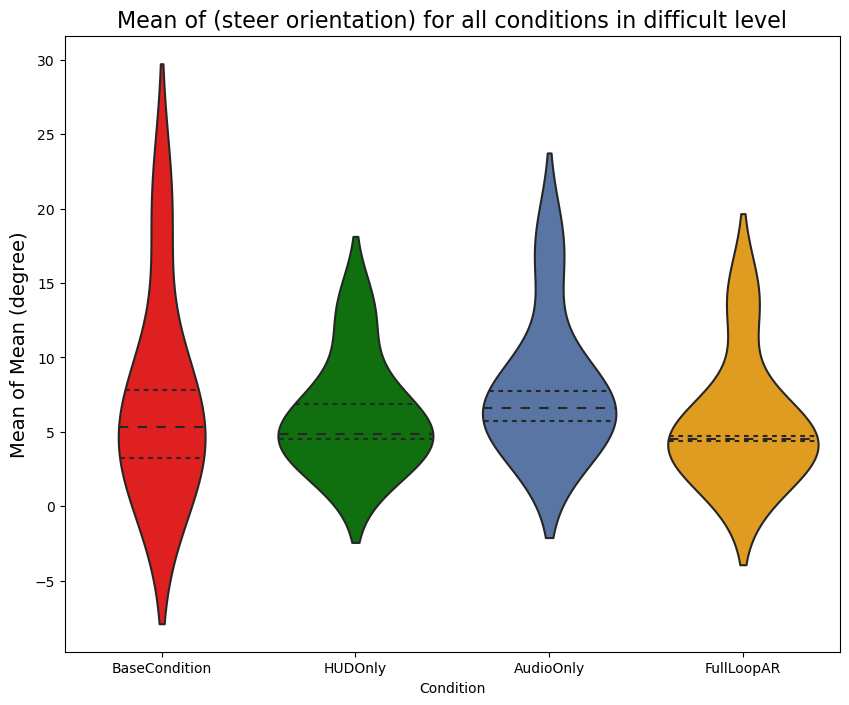

In [ ]:
# then here we take  mean of the grouped_multiple_mean_difficult_normal df from last part based on event and condition for difficult level and plot the violin plot for 4 conditions

cond_color_dict = {
    'HUDOnly': 'green',
    'AudioOnly': (0.298, 0.447, 0.690),
    'FullLoopAR': 'orange',
    'BaseCondition': 'red'
}
cond_order = ['BaseCondition', 'HUDOnly', 'AudioOnly', 'FullLoopAR']
cond_colors = [cond_color_dict[c] for c in cond_order]
# Group the data by Condition and Event columns and calculate the mean of circular_mean
grouped_mean_difficult_mean_normal = grouped_multiple_mean_difficult_normal.groupby(['Condition', 'Event']).mean().reset_index()
grouped_mean_difficult_mean_normal = grouped_mean_difficult_mean_normal.sort_values(by=['Event'], ascending=True, key=lambda x: x.map({'Event_' + str(i): i for i in range(1, 13)})).reset_index(drop=True)

# Plot the mean circular mean using a violin plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(x='Condition', y='mean', data=grouped_mean_difficult_mean_normal, ax=ax, inner='quartile' ,split=True, height=8, aspect=0.8, order=['BaseCondition', 'HUDOnly', 'AudioOnly', 'FullLoopAR'], palette=cond_colors)

# Set the title and y-label
ax.set_title('Mean of (steer orientation) for all conditions in difficult level', fontsize=16)
ax.set_ylabel('Mean of Mean (degree)', fontsize=14)
#plt.show()
#plt.savefig(' mean_all_plot_diff .png')

#grouped_mean_difficult_mean_normal

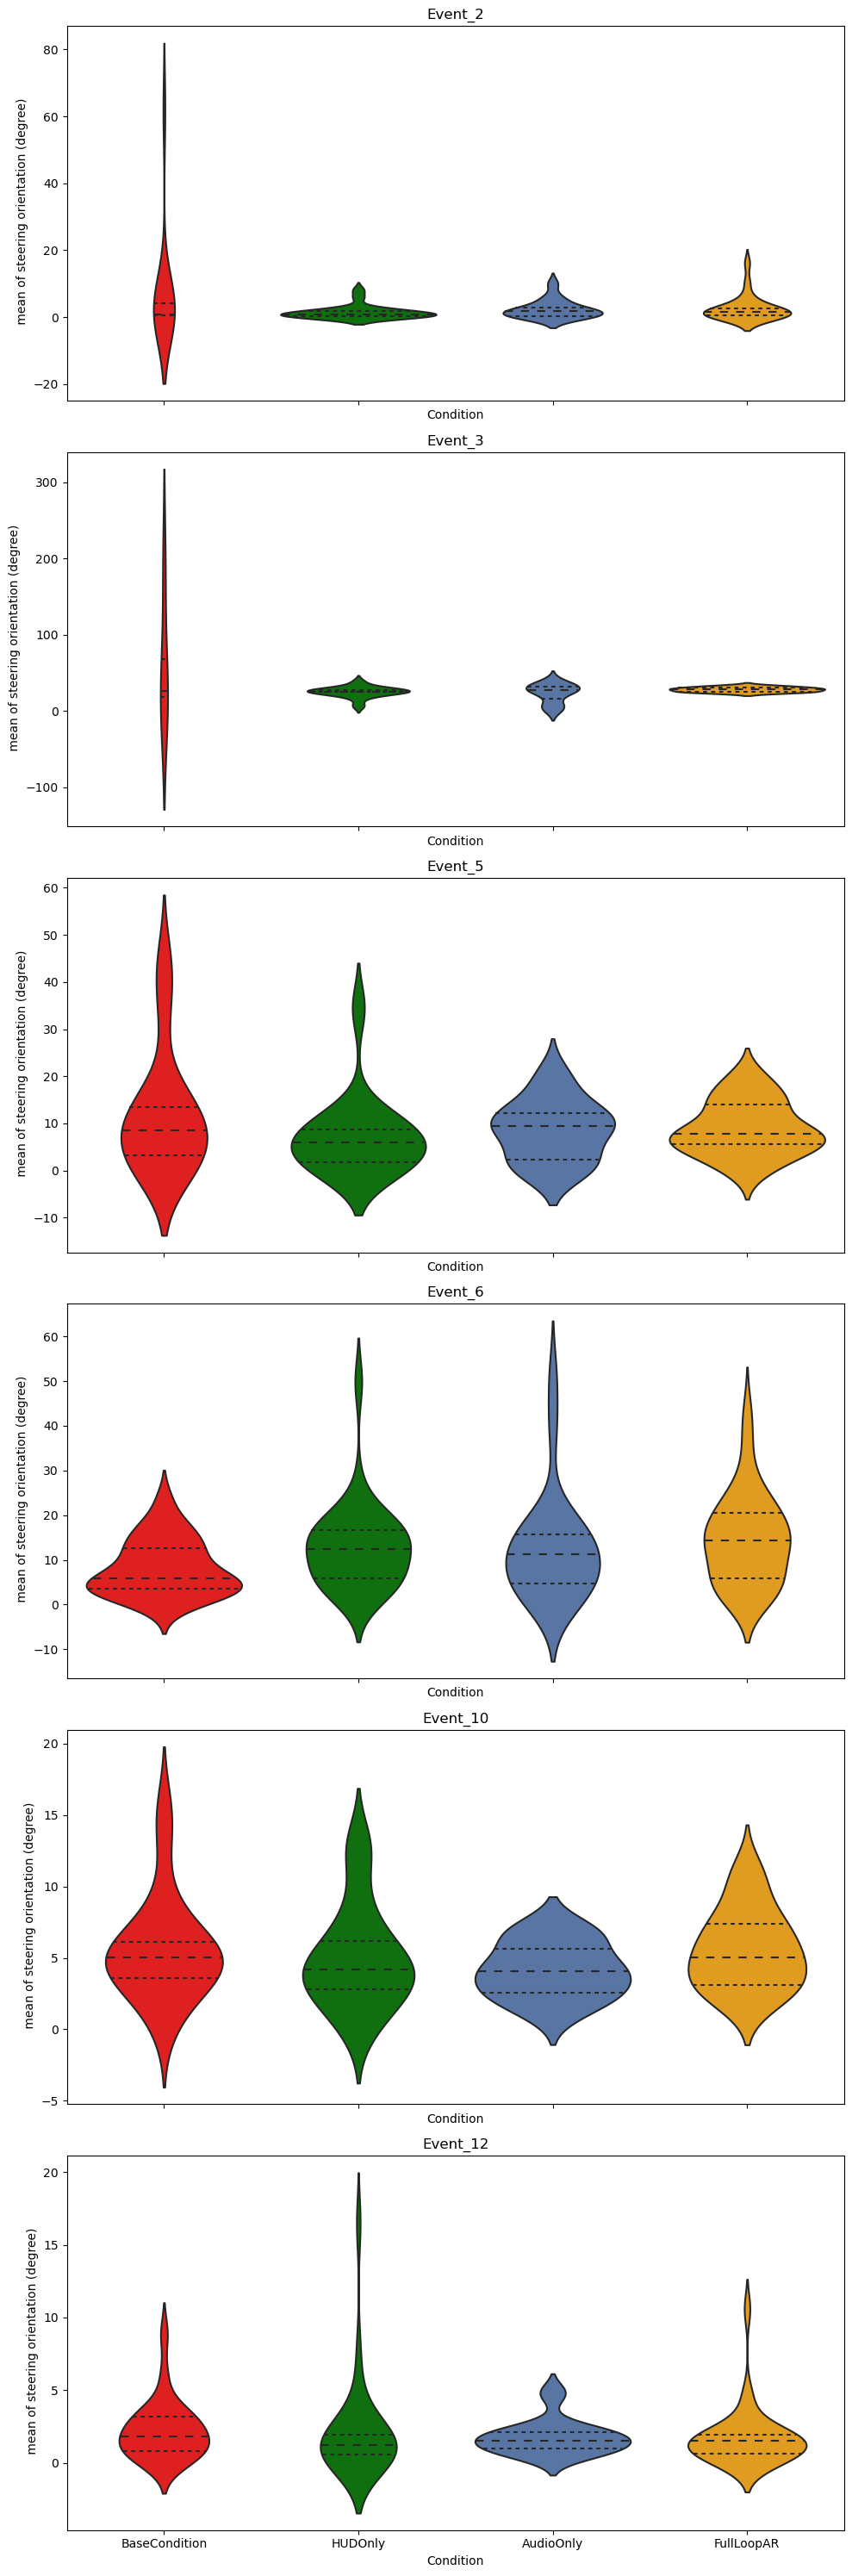

In [ ]:
# # here we take absolute mean of steerinput(angle) based on event, uid (participant) and condition for easy level and plot the violin plot for all 6 events (easy)
cond_color_dict = {
    'HUDOnly': 'green',
    'AudioOnly': (0.298, 0.447, 0.690),
    'FullLoopAR': 'orange',
    'BaseCondition': 'red'
}
Events_easy = ['Event_2', 'Event_3', 'Event_5', 'Event_6','Event_10','Event_12']
#Events_easy = ['Event_2', 'Event_5', 'Event_6', 'Event_10','Event_7','Event_12']

cond_order = ['BaseCondition', 'HUDOnly', 'AudioOnly', 'FullLoopAR']
cond_colors = [cond_color_dict[c] for c in cond_order]

# use the isin method to filter the DataFrame by the desired events
New_df_easy_succuss = df_success[df_success['Event'].isin(Events_easy)]
grouped_multiple_mean_easy_normal_succuss = New_df_easy_succuss.groupby(['Condition', 'Event','uid'])['angle'].mean().abs().reset_index()
grouped_multiple_mean_easy_normal_succuss.columns = ['Condition', 'Event', 'uid', 'mean']
grouped_multiple_mean_easy_normal_succuss = grouped_multiple_mean_easy_normal_succuss.sort_values(by=['Event'], ascending=True, key=lambda x: x.map({'Event_' + str(i): i for i in range(1, 13)})).reset_index(drop=True)

fig.suptitle(' mean of steer Orientation in different conditions', fontsize=16)

fig, axes = plt.subplots(nrows=len(Events_easy), ncols=1, figsize=(10, 5*len(Events_easy)), sharex=True)

for i, event in enumerate(Events_easy):
    event_data = grouped_multiple_mean_easy_normal_succuss[grouped_multiple_mean_easy_normal_succuss['Event'] == event]
    ax = axes[i]
    sns.violinplot(x='Condition', y='mean', data=event_data, ax=ax, inner='quartile', split=True, height=8, aspect=0.8, order=['BaseCondition', 'HUDOnly', 'AudioOnly', 'FullLoopAR'], palette=cond_colors)
    ax.set_title(event)
    ax.set(ylabel=' mean of steering orientation (degree)')



plt.tight_layout()
#plt.savefig('cir mean_all_angle_color .png')
#grouped_multiple_mean_easy_normal_succuss

Text(0, 0.5, 'Mean of Mean (degree)')

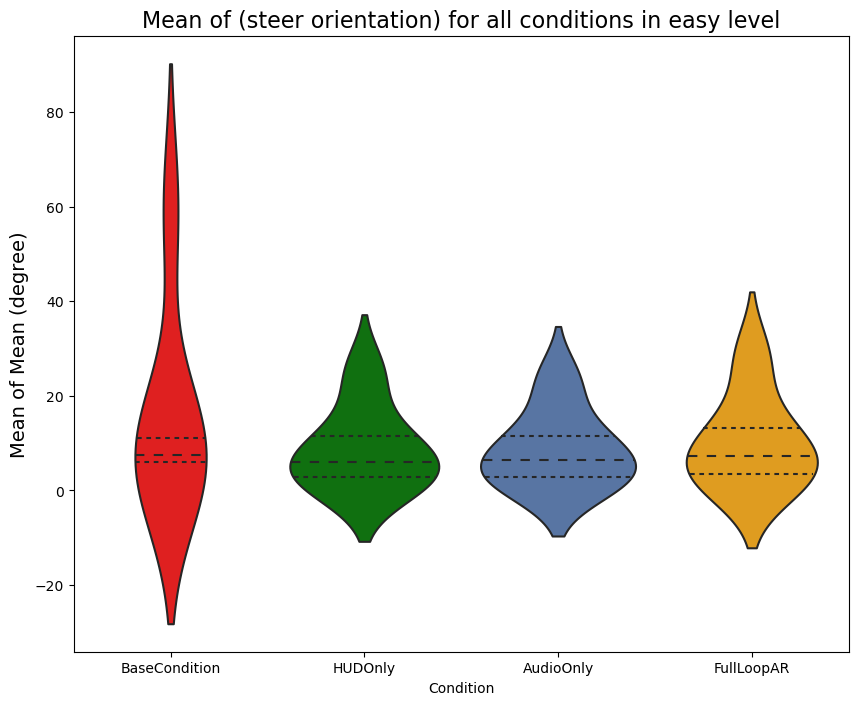

In [ ]:
# then here we take mean of the grouped_multiple_mean_easy_normal_succuss df from last part based on event and condition for easy level and plot the violin plot for 4 conditions

cond_color_dict = {
    'HUDOnly': 'green',
    'AudioOnly': (0.298, 0.447, 0.690),
    'FullLoopAR': 'orange',
    'BaseCondition': 'red'
}
cond_order = ['BaseCondition', 'HUDOnly', 'AudioOnly', 'FullLoopAR']
cond_colors = [cond_color_dict[c] for c in cond_order]
# Group the data by Condition and Event columns and calculate the mean of circular_mean
grouped_mean_easy_mean_normal = grouped_multiple_mean_easy_normal_succuss.groupby(['Condition', 'Event']).mean().reset_index()
grouped_mean_easy_mean_normal = grouped_mean_easy_mean_normal.sort_values(by=['Event'], ascending=True, key=lambda x: x.map({'Event_' + str(i): i for i in range(1, 13)})).reset_index(drop=True)

# Plot the mean circular mean using a violin plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(x='Condition', y='mean', data=grouped_mean_easy_mean_normal, ax=ax, inner='quartile', split=True, height=8, aspect=0.8, order=['BaseCondition', 'HUDOnly', 'AudioOnly', 'FullLoopAR'], palette=cond_colors)

# Set the title and y-label
ax.set_title('Mean of (steer orientation) for all conditions in easy level', fontsize=16)
ax.set_ylabel('Mean of Mean (degree)', fontsize=14)
#plt.show()
#plt.savefig(' mean_all_plot_easy.png')

#grouped_mean_easy_mean_normal

In [ ]:
# here we make a df by taking mean of angle column based on condition, uid and level for doing the anova
Two_way_mean_angle_state = df_success.groupby(['Condition','uid','Level'])['angle'].mean().reset_index()
Two_way_mean_angle_state.columns = ['Condition', 'uid', 'Level','angle_mean']
Two_way_mean_angle_state
#df_Ev_all_state
# df_success

,Condition,uid,Level,angle_mean
0,AudioOnly,0bc17d704fec4a9eb892d905fc2e5da9,Difficult,-0.231287
1,AudioOnly,0bc17d704fec4a9eb892d905fc2e5da9,Easy,-4.837224
2,AudioOnly,11651f8400384fb1a6ac102e6696201c,Difficult,-26.005911
3,AudioOnly,11651f8400384fb1a6ac102e6696201c,Easy,-1.521220
4,AudioOnly,13ec39a03bbb465eae777fe9564c7e97,Difficult,-0.024633
...,...,...,...,...
243,HUDOnly,edb7b59f47a24fa1bab1b853790cd0ab,Easy,-8.852473
244,HUDOnly,ef0636bf75a345fd937f66a883b23c4d,Difficult,-2.614214
245,HUDOnly,ef0636bf75a345fd937f66a883b23c4d,Easy,-1.343084
246,HUDOnly,f78cb865f76b4ce4879083715f112d91,Difficult,-1.692835


In [ ]:
# here we take two way anova to see the impact of two independent variables (level and condition ) on our dependent variable (angle)
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('angle_mean ~ C(Condition) + C(Level) + C(Condition):C(Level)', data=Two_way_mean_angle_state).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(Condition),88.730032,3.0,0.533901,6.594577e-01
C(Level),2422.795100,1.0,43.734899,2.420441e-10
C(Condition):C(Level),27.781392,3.0,0.167165,9.184491e-01
Residual,13295.350721,240.0,NaN,NaN


In [ ]:
# here we do a MultiComparison class for performing multiple comparisons or post hoc tests after conducting an analysis of variance (two way ANOVA) across different conditions
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(Two_way_mean_angle_state['angle_mean'], Two_way_mean_angle_state['Condition'])
tukey_results = mc.tukeyhsd(alpha=0.05)
# Print the results
print(tukey_results.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
    AudioOnly BaseCondition  -0.4528 0.9911 -4.4341 3.5285  False
    AudioOnly    FullLoopAR  -1.5316  0.736 -5.4038 2.3407  False
    AudioOnly       HUDOnly   -0.187 0.9993 -4.1418 3.7677  False
BaseCondition    FullLoopAR  -1.0788 0.8642 -4.6638 2.5062  False
BaseCondition       HUDOnly   0.2657 0.9977 -3.4082 3.9397  False
   FullLoopAR       HUDOnly   1.3445  0.762 -2.2109    4.9  False
-----------------------------------------------------------------


In [ ]:
# here we do a MultiComparison class for performing multiple comparisons or post hoc tests after conducting an analysis of variance (two way ANOVA) across different levels
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(Two_way_mean_angle_state['angle_mean'], Two_way_mean_angle_state['Level'])
tukey_results = mc.tukeyhsd(alpha=0.05)
# Print the results
print(tukey_results.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1  group2 meandiff p-adj  lower   upper  reject
------------------------------------------------------
Difficult   Easy  -6.2559   0.0 -8.1029 -4.4088   True
------------------------------------------------------


In [ ]:
# Calculate percentage of True and False values in SuccessfulCompletionState column
success_counts = df_Ev_all['SuccessfulCompletionState'].value_counts()
success_counts = success_counts / len(df_Ev_all) * 100
success_counts = success_counts.reset_index(name='Percentage')

print(success_counts)

   index  Percentage
0   True   73.876221
1  False   26.123779


In [ ]:
# Group by condition column and calculate percentage of True and False values in each group
grouped = df_Ev_all.groupby('Condition')['SuccessfulCompletionState'].value_counts(normalize=True) * 100
# Convert the grouped Series into a dataframe
df_grouped = grouped.reset_index(name='Percentage')

print(df_grouped)

       Condition  SuccessfulCompletionState  Percentage
0      AudioOnly                       True   73.887125
1      AudioOnly                      False   26.112875
2  BaseCondition                       True   63.385436
3  BaseCondition                      False   36.614564
4     FullLoopAR                       True   76.567050
5     FullLoopAR                      False   23.432950
6        HUDOnly                       True   79.155927
7        HUDOnly                      False   20.844073


C:\Users\49178\AppData\Local\Temp\ipykernel_38800\3855255811.py:9: RuntimeWarning: invalid value encountered in sqrt
  std_angle = np.sqrt(-2 * np.log(np.abs(np.mean(np.exp(1j*np.deg2rad(angles-mean_angle)))))) * 180/np.pi


,Condition,Event,uid,circular_std
0,AudioOnly,Event_1,11651f8400384fb1a6ac102e6696201c,29.032067
1,HUDOnly,Event_1,c47cc5dba3834b91899cc20534e0f7be,17.392467
2,HUDOnly,Event_1,c5253fb4bc5143118ac36b4e98f43dda,19.308178
3,HUDOnly,Event_1,e5a628df7e514b288fb6c6024f32e6d8,22.535018
4,BaseCondition,Event_1,7de8141926e0497396bddddf37a1b115,45.471024
...,...,...,...,...
554,HUDOnly,Event_12,e51c62a636934699b9a2b304635ba0fe,12.460815
555,HUDOnly,Event_12,cdc892a8498f4de8ba7563d28c02aa21,4.626822
556,HUDOnly,Event_12,c5253fb4bc5143118ac36b4e98f43dda,7.618127
557,BaseCondition,Event_12,d18584bc440c4900ab9677fd5c411dc5,8.914630


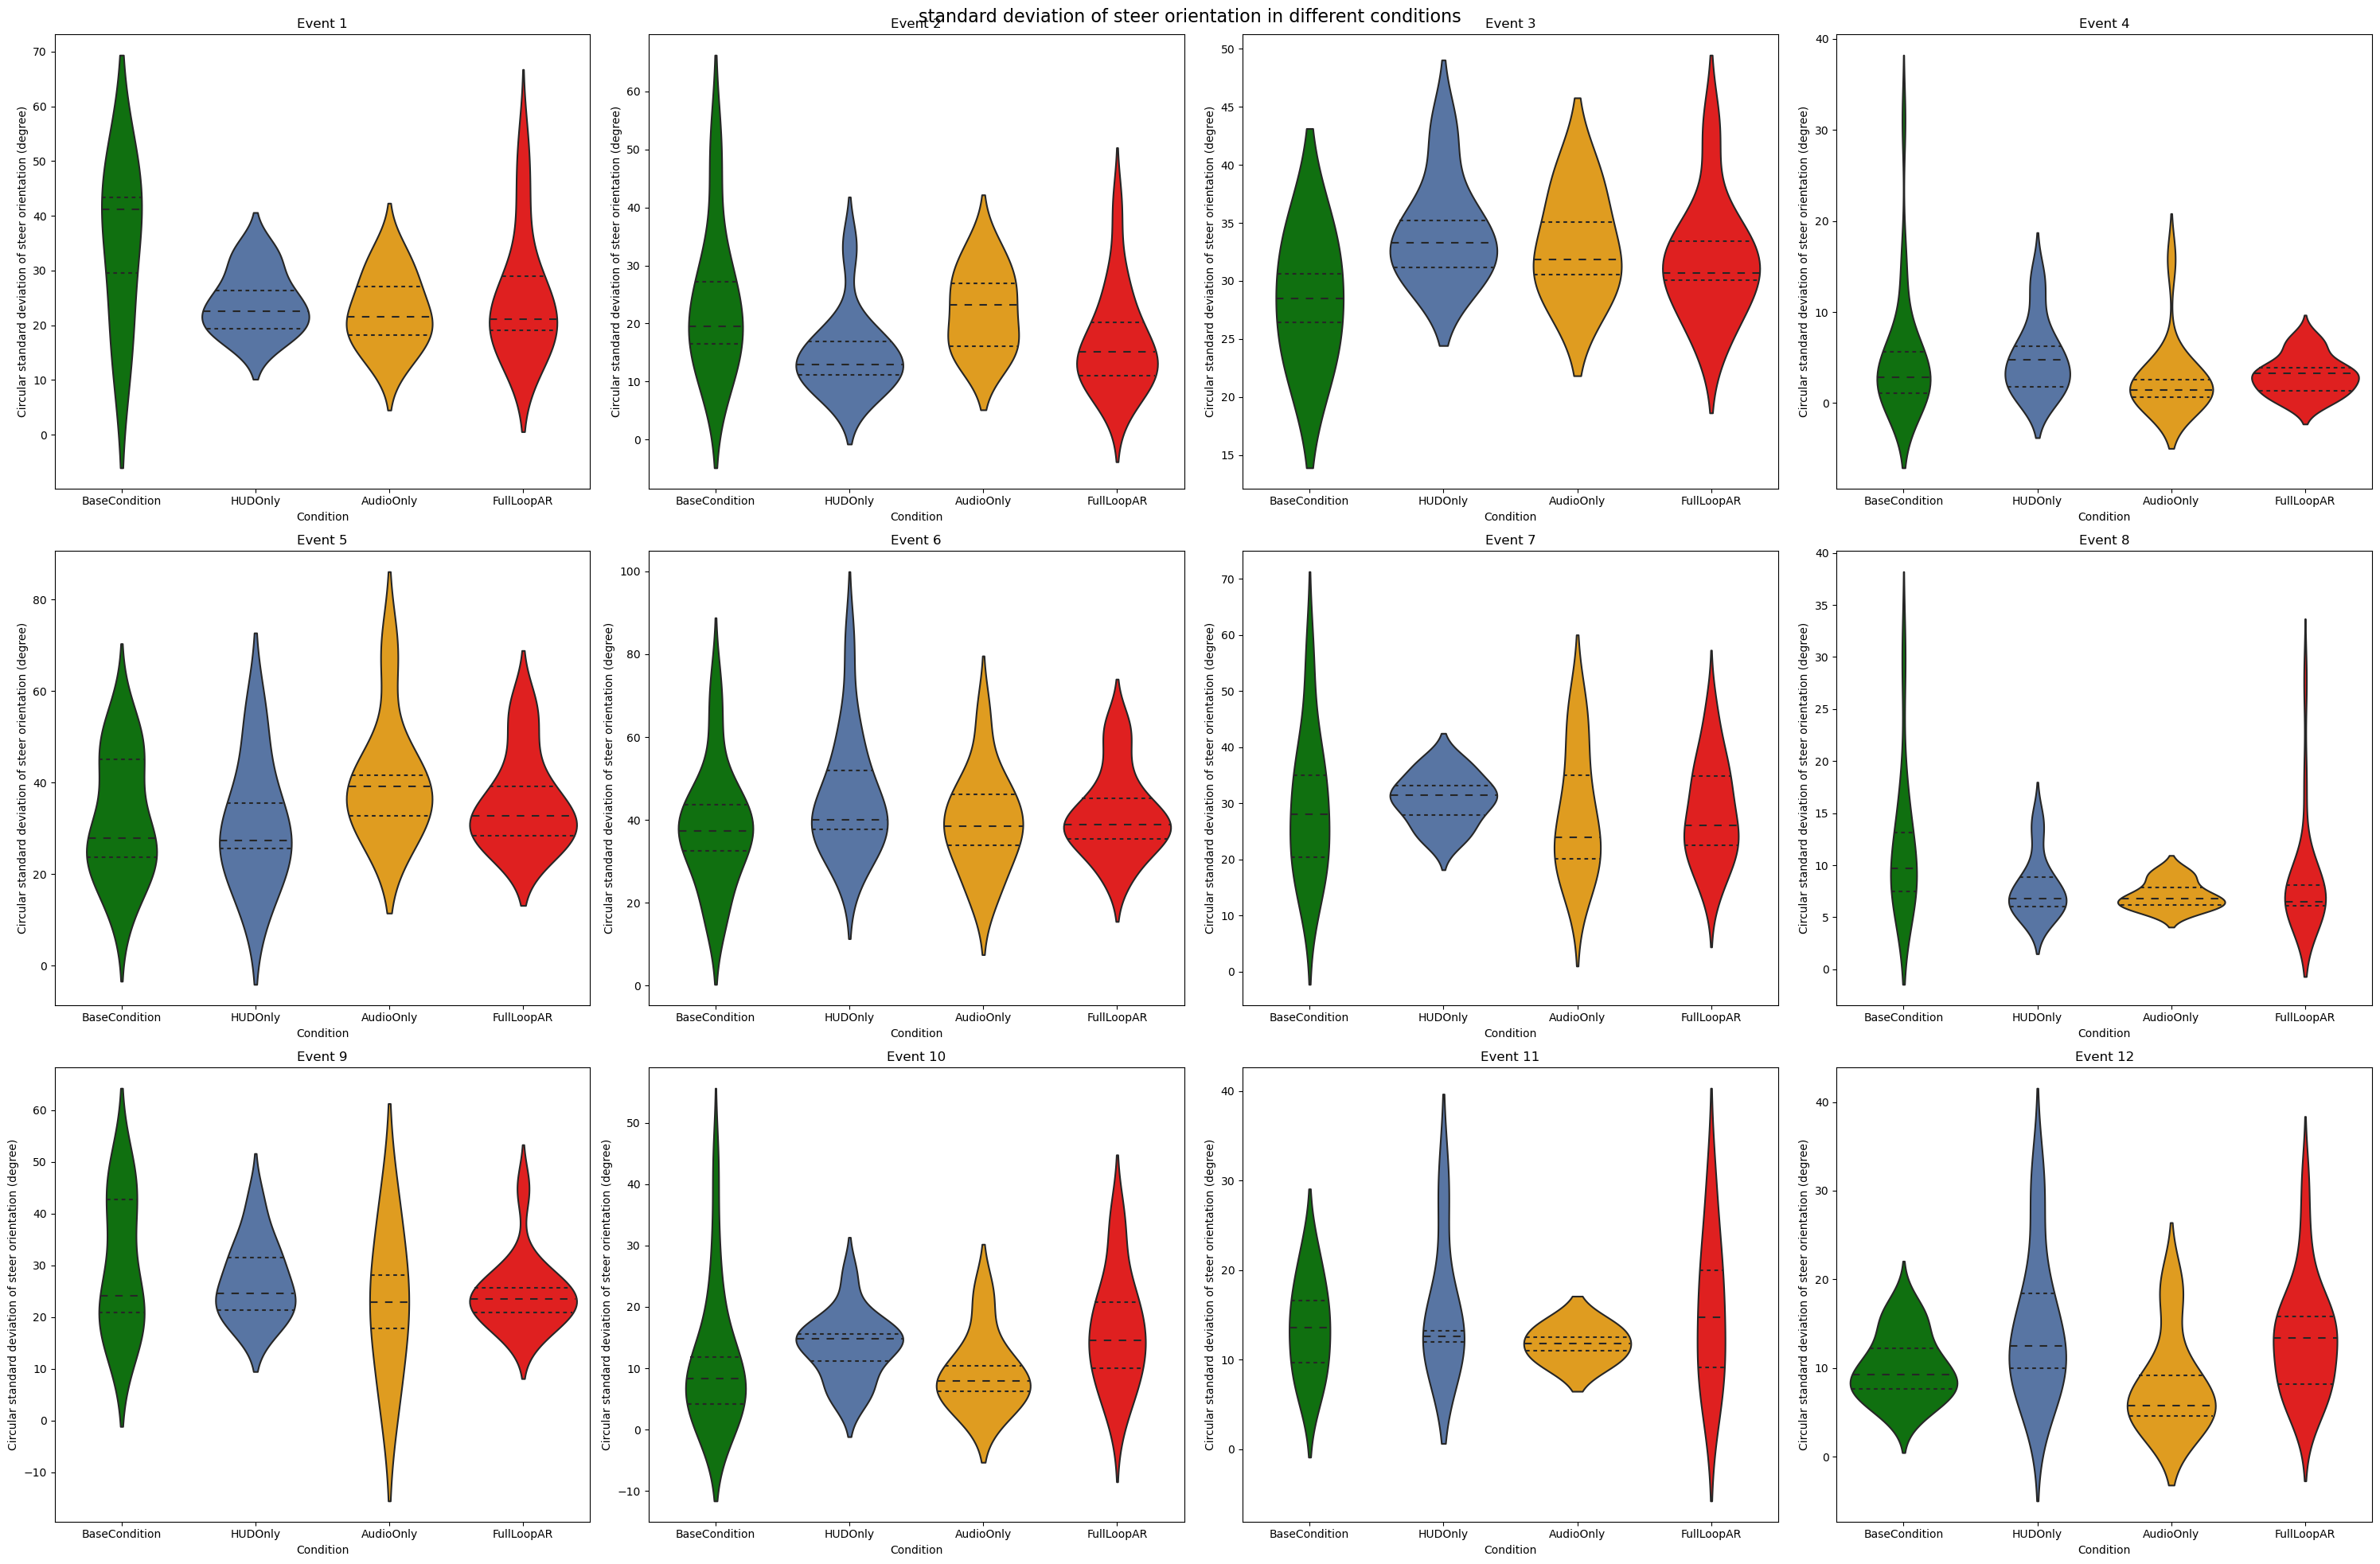

In [ ]:
# we take standard deviation calculation for angle column
cond_color_dict = {
    'HUDOnly': 'green',
    'AudioOnly': (0.298, 0.447, 0.690),
    'FullLoopAR': 'orange',
    'BaseCondition': 'red'
}
def circular_std(angles):
    mean_angle = np.arctan2(np.mean(np.sin(np.deg2rad(angles))), np.mean(np.cos(np.deg2rad(angles))))
    std_angle = np.sqrt(-2 * np.log(np.abs(np.mean(np.exp(1j*np.deg2rad(angles-mean_angle)))))) * 180/np.pi
    return std_angle

grouped_multiple_std_success = df_success.groupby(['Condition', 'Event','uid'])['angle'].apply(circular_std).reset_index()
grouped_multiple_std_success.columns = ['Condition', 'Event', 'uid', 'circular_std']
grouped_multiple_std_success = grouped_multiple_std_success.sort_values(by=['Event'], ascending=True, key=lambda x: x.map({'Event_' + str(i): i for i in range(1, 13)})).reset_index(drop=True)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30,20))

fig.suptitle('standard deviation of steer orientation in different conditions', fontsize=16)

for i, event in enumerate(range(1, 13)):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    event_data = grouped_multiple_std_success[grouped_multiple_std_success['Event'] == f'Event_{event}']
    sns.violinplot(x='Condition', y='circular_std', data=event_data, ax=ax, inner='quartile', split=True, height=8, aspect=0.8, order=['BaseCondition', 'HUDOnly', 'AudioOnly', 'FullLoopAR'], palette=cond_color_dict.values())
    ax.set_title(f'Event {event}')
    ax.set(ylabel='Circular standard deviation of steer orientation (degree)')

plt.tight_layout()
plt.savefig('Std_df_Ev_all_state_true_state .png')

grouped_multiple_std_success

In [ ]:
counts = df_Ev_all_state['uid'].nunique()

print(counts)

76


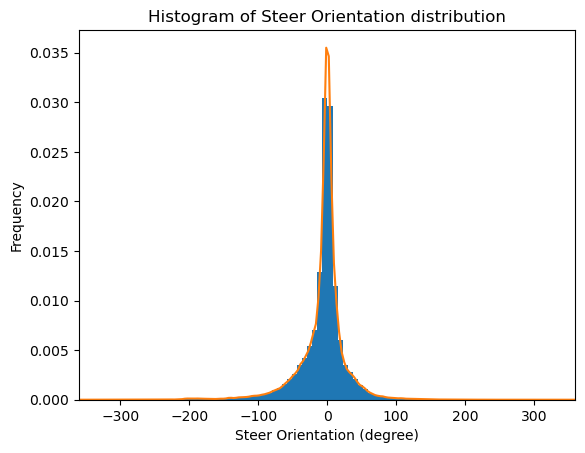

In [ ]:

# the angle column distribution
df_tmp = df_Ev_all[["angle"]]

df_Ev_all.angle.plot.hist(bins=100, density=True)

sns.kdeplot(data=df_tmp , x='angle')
plt.xlim([-360, 360])
# Add labels and a title
plt.xlabel('Steer Orientation (degree)')
plt.title('Histogram of Steer Orientation distribution')
plt.savefig(' angle_dist_last .png')

(-5.63708115659388, 35.06746833682032)

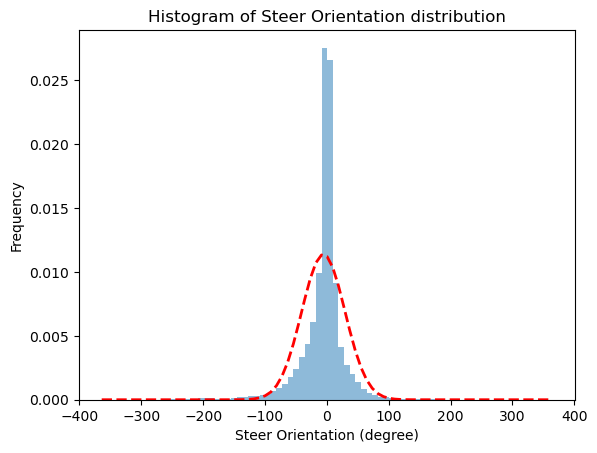

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
# Select the "angle" column values
angle_data = df_Ev_all['angle']

# Calculate the mean and standard deviation of the data
mu, sigma = norm.fit(angle_data)

# Plot a histogram of the data
n, bins, patches = plt.hist(angle_data, bins=80, density=True, alpha=0.5)

# Plot the normal PDF on top of the histogram
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)

# Add labels and a title
plt.xlabel('Steer Orientation (degree)')
plt.ylabel('Frequency')
plt.title('Histogram of Steer Orientation distribution')
#  df_success df_unsuccess
# Show the plot
#plt.show()
mu, sigma
#plt.savefig(' angle_dist_2 .png') eye_theta_h_deg

(1.2317933217465113, 6.714439492577975)

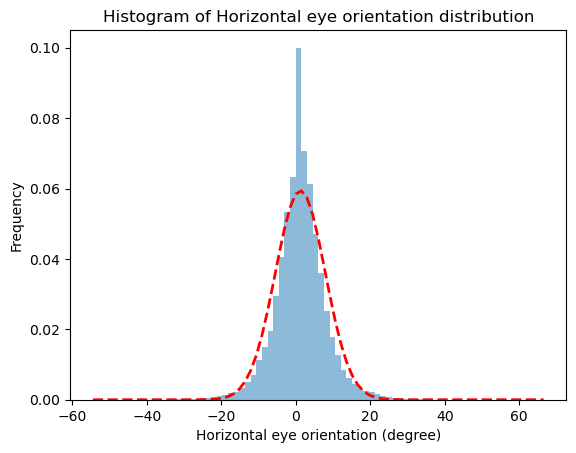

In [ ]:
# the eye_theta_h_deg column values  distribution

import matplotlib.pyplot as plt
from scipy.stats import norm
# Select the "angle" column
angle_data = df_Ev_all['eye_theta_h_deg']

# Calculate the mean and standard deviation of the data
mu, sigma = norm.fit(angle_data)

# Plot a histogram of the data
n, bins, patches = plt.hist(angle_data, bins=80, density=True, alpha=0.5)

# Plot the normal PDF on top of the histogram
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=2)

# Add labels and a title
plt.xlabel('Horizontal eye orientation (degree)')
plt.ylabel('Frequency')
plt.title('Histogram of Horizontal eye orientation distribution')
#  df_success df_unsuccess
# Show the plot
#plt.show()
mu, sigma
#plt.savefig(' angle_dist_2 .png')

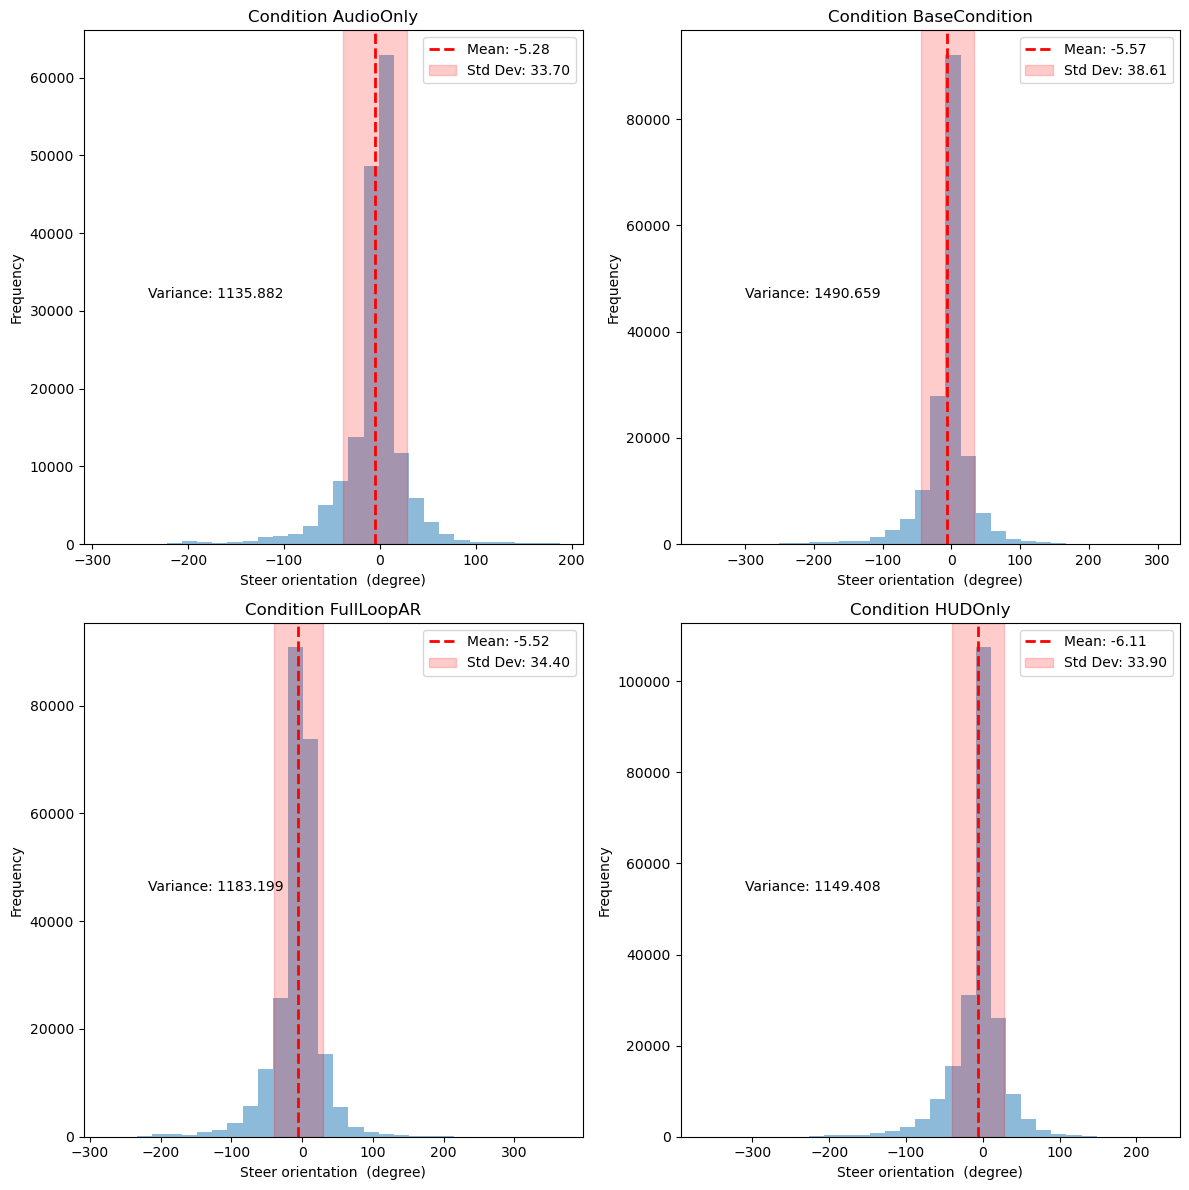

In [ ]:
# the angle column values distribution for each condition seperately
# Group data by condition and select angle column
grouped = df_Ev_all.groupby('Condition')['angle']
# Calculate mean and variance for each condition
means = grouped.mean()
variances = grouped.var()

# Create separate histograms for each condition, with mean and variance shown in plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, (condition, data) in enumerate(grouped):
    ax = axes[i]
    ax.hist(data, bins=30, alpha=0.5)
    ax.axvline(x=means[condition], color='r', linestyle='--', linewidth=2, label=f'Mean: {means[condition]:.2f}')
    ax.axvspan(means[condition] - np.sqrt(variances[condition]), means[condition] + np.sqrt(variances[condition]), alpha=0.2, color='red', label=f'Std Dev: {np.sqrt(variances[condition]):.2f}')
    ax.text(0.4,0.5, f'Variance: {variances[condition]:.3f}', transform=ax.transAxes, ha='right', va='top')

    ax.set_title(f'Condition {condition}')
    ax.set_xlabel('Steer orientation  (degree)')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()